# A304_SRO_NGO_Hall_200K_p1T_to_n1T

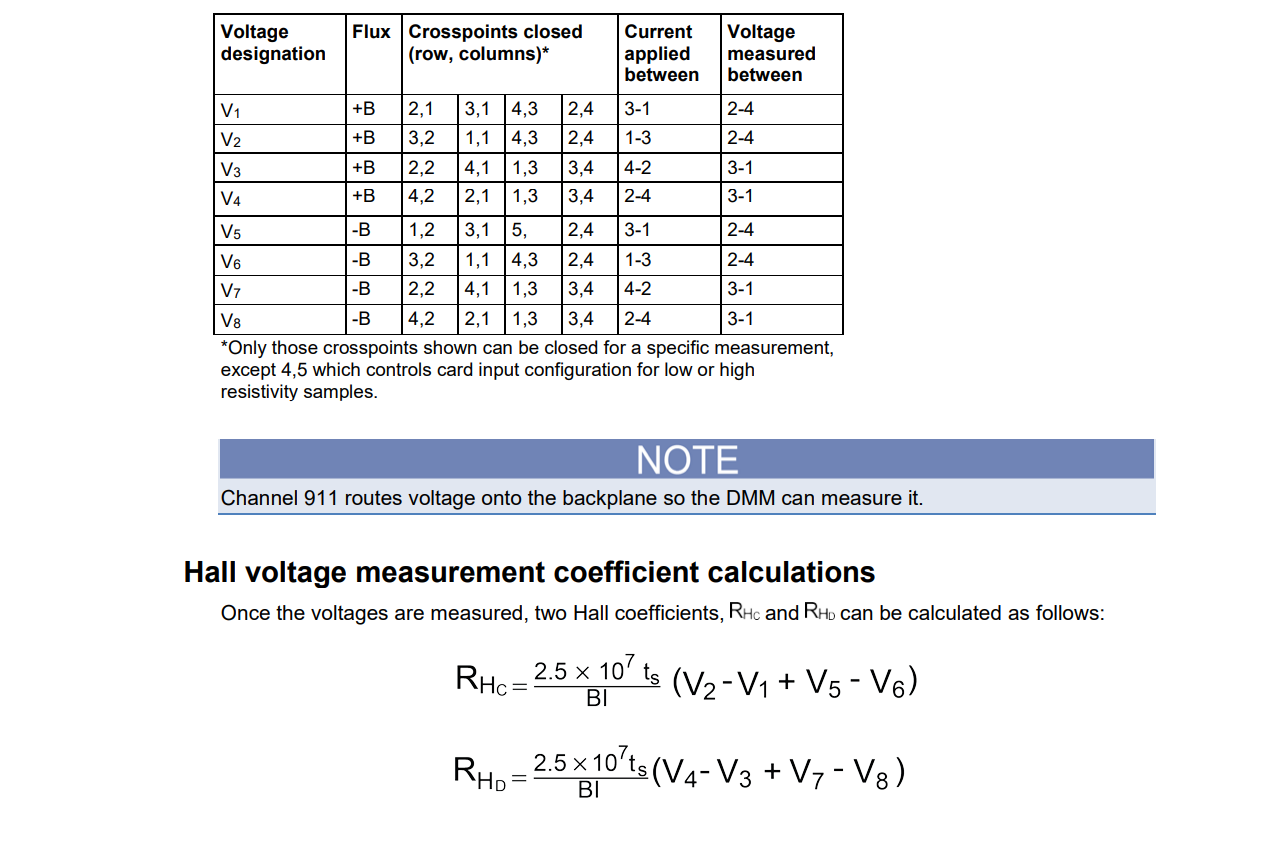

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [53]:
filename='C:\\Users\\Admin\\Desktop\\Data\\4_june_2023\\A304_SRO_NGO_Hall_200K_p1T_n1T.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.208936,200.099704,810.284730,-810.280662,-799.619056,799.509714,1.137500e-06,1000000
1,0.001,9000.484814,200.013990,809.515098,-809.548126,-799.999305,799.963550,8.982000e-07,1000000
2,0.001,8000.365088,200.006140,808.927080,-808.962781,-800.507737,800.532906,7.742000e-07,1000000
3,0.001,7000.523877,200.002619,808.390527,-808.396318,-800.962638,801.026077,7.327000e-07,1000000
4,0.001,6000.334351,200.000831,807.847566,-807.850885,-801.494129,801.516649,7.145000e-07,1000000
...,...,...,...,...,...,...,...,...,...
61,0.001,6000.287842,200.000533,807.404230,-807.407572,-801.037775,801.076941,6.292000e-07,1000000
62,0.001,7000.451196,200.000834,807.886762,-807.929625,-800.476170,800.523081,6.258000e-07,1000000
63,0.001,8000.278516,200.000474,808.419801,-808.399082,-799.925022,799.954328,6.252000e-07,1000000
64,0.001,9000.381738,200.000795,808.900488,-808.906155,-799.364965,799.390354,6.300000e-07,1000000


In [54]:
df['V1'] = -1*df['V1']
df['V2'] = -1*df['V2']
df['V3'] = -1*df['V3']
df['V4'] = -1*df['V4']

### Converting B to integer B

In [55]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [56]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.208936,10000,200.099704,-810.284730,810.280662,799.619056,-799.509714,1.137500e-06,1000000
1,0.001,9000.484814,9000,200.013990,-809.515098,809.548126,799.999305,-799.963550,8.982000e-07,1000000
2,0.001,8000.365088,8000,200.006140,-808.927080,808.962781,800.507737,-800.532906,7.742000e-07,1000000
3,0.001,7000.523877,7000,200.002619,-808.390527,808.396318,800.962638,-801.026077,7.327000e-07,1000000
4,0.001,6000.334351,6000,200.000831,-807.847566,807.850885,801.494129,-801.516649,7.145000e-07,1000000


In [57]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

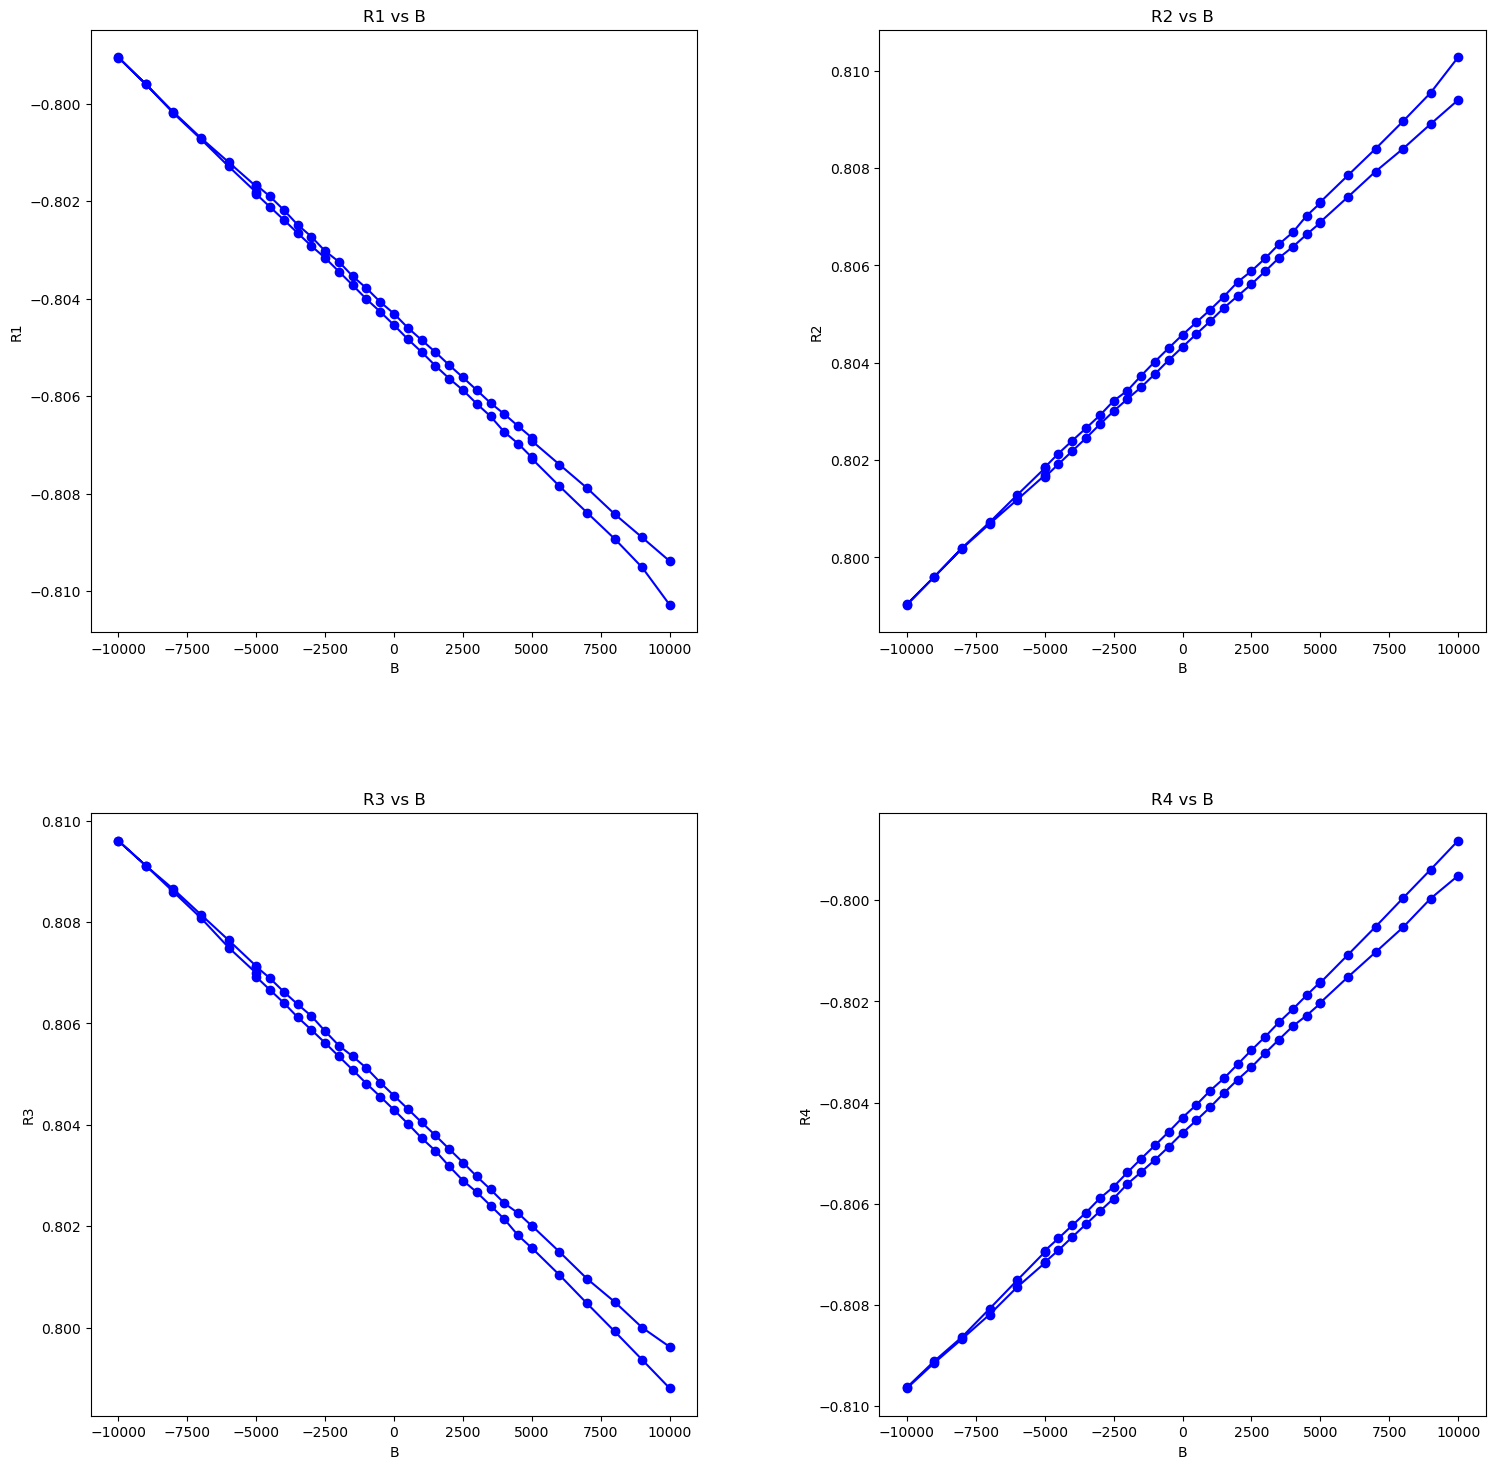

In [58]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [59]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [60]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [61]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [62]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.208936,10000,200.099704,-810.284730,810.280662,799.619056,-799.509714,1.137500e-06,1000000
1,0.001,9000.484814,9000,200.013990,-809.515098,809.548126,799.999305,-799.963550,8.982000e-07,1000000
2,0.001,8000.365088,8000,200.006140,-808.927080,808.962781,800.507737,-800.532906,7.742000e-07,1000000
3,0.001,7000.523877,7000,200.002619,-808.390527,808.396318,800.962638,-801.026077,7.327000e-07,1000000
4,0.001,6000.334351,6000,200.000831,-807.847566,807.850885,801.494129,-801.516649,7.145000e-07,1000000


In [63]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
33,0.001,-10000.223633,-10000,200.000192,-799.054709,799.024018,809.600218,-809.637166,6.653000e-07,1000000
34,0.001,-9000.298584,-9000,200.000941,-799.600907,799.603419,809.113253,-809.113861,6.615000e-07,1000000
35,0.001,-8000.374951,-8000,200.000476,-800.172731,800.180261,808.595258,-808.640041,6.506000e-07,1000000
36,0.001,-7000.309204,-7000,200.000948,-800.704485,800.689358,808.080029,-808.081223,6.527000e-07,1000000
37,0.001,-6000.340820,-6000,200.000850,-801.200192,801.184821,807.498888,-807.517909,6.609000e-07,1000000


In [64]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [65]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,200.099704,-810.284730,810.280662,799.619056,-799.509714,-799.054709,799.024018,809.600218,-809.637166,1000000
1,0.001,9000,200.013990,-809.515098,809.548126,799.999305,-799.963550,-799.600907,799.603419,809.113253,-809.113861,1000000
2,0.001,8000,200.006140,-808.927080,808.962781,800.507737,-800.532906,-800.172731,800.180261,808.595258,-808.640041,1000000
3,0.001,7000,200.002619,-808.390527,808.396318,800.962638,-801.026077,-800.704485,800.689358,808.080029,-808.081223,1000000
4,0.001,6000,200.000831,-807.847566,807.850885,801.494129,-801.516649,-801.200192,801.184821,807.498888,-807.517909,1000000


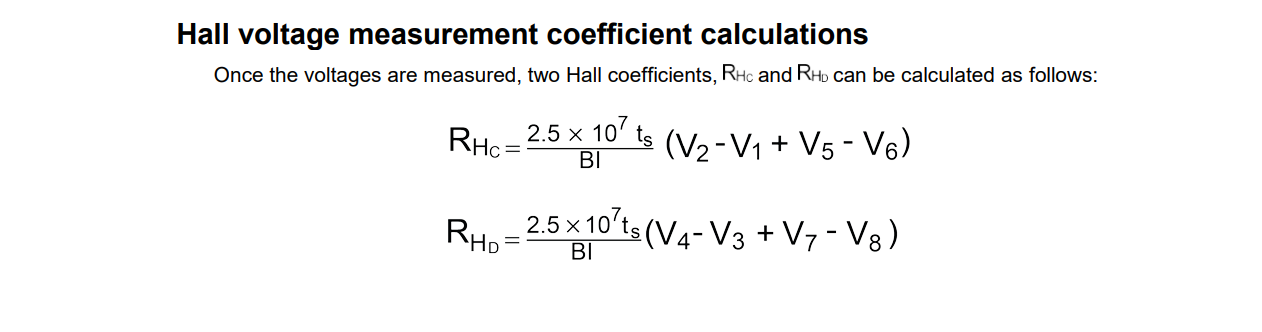
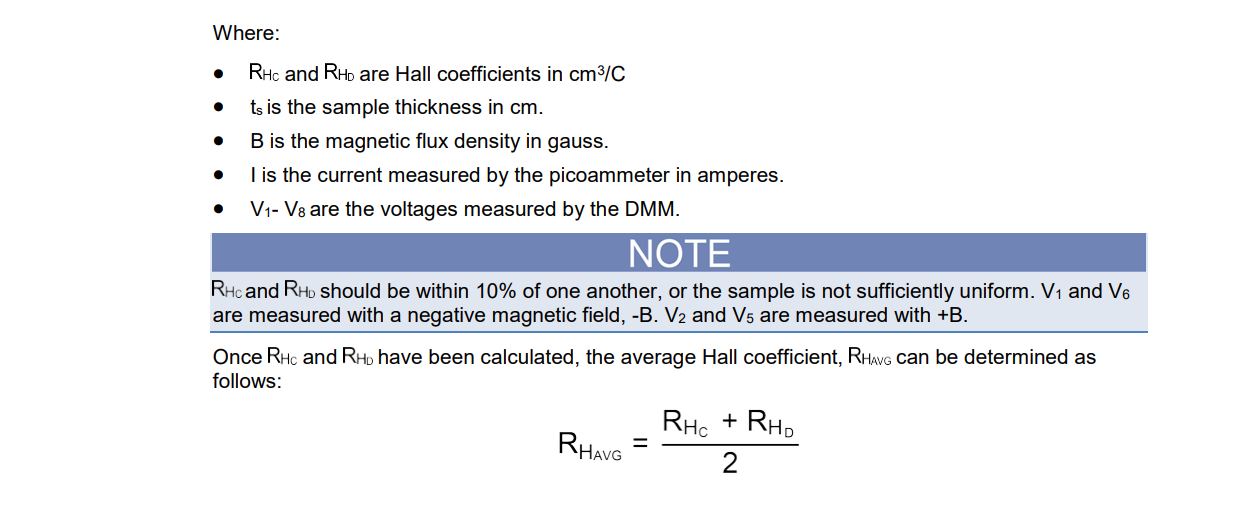

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [66]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


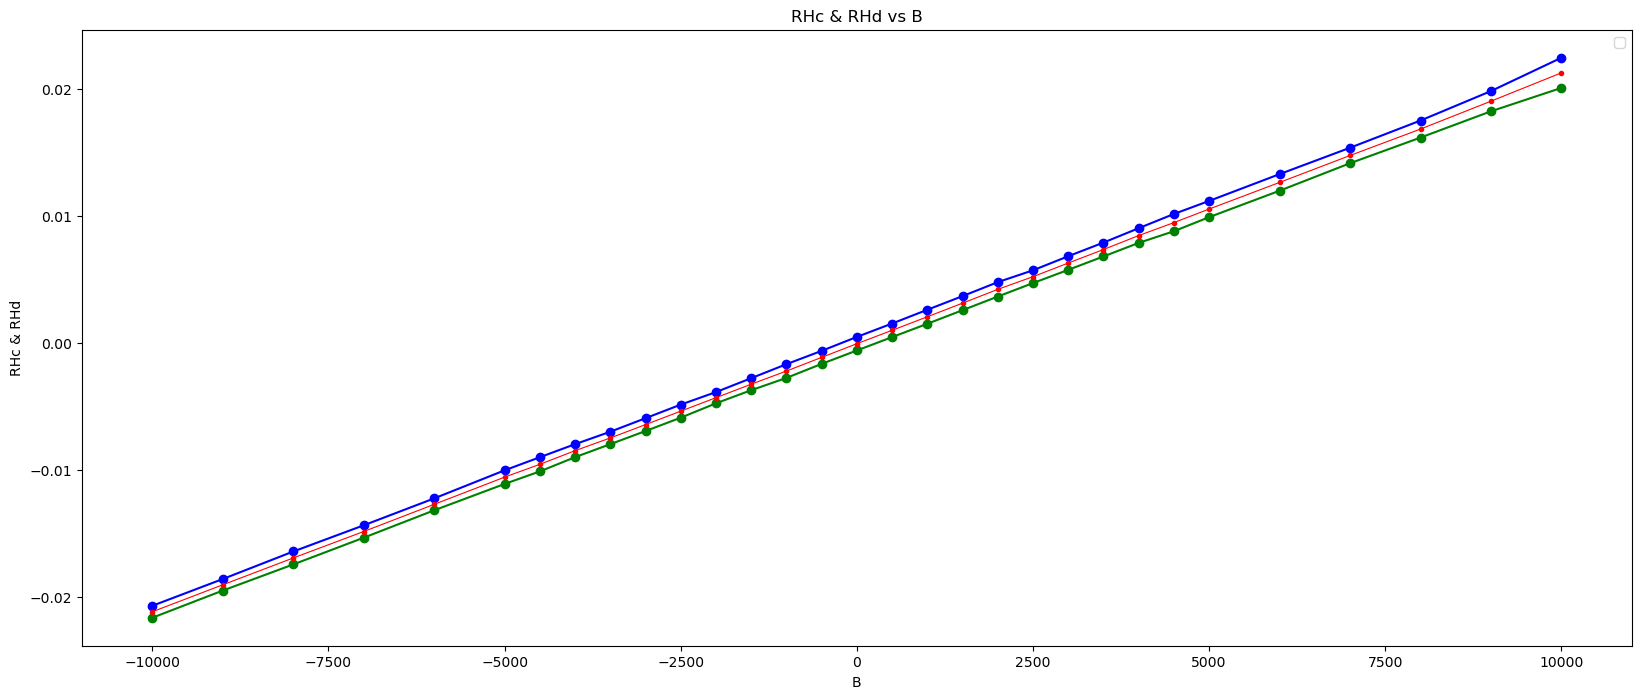

In [90]:
plt.figure(figsize=(20,8))
plt.plot(data['B'],data['RHc'],'bo-')
plt.plot(data['B'],data['RHd'],'go-')
plt.plot(data['B'],data['R'],'ro-', linewidth=0.8, markersize=3)
plt.title('RHc & RHd vs B')
plt.ylabel('RHc & RHd')
plt.xlabel('B')
plt.legend()
plt.show()

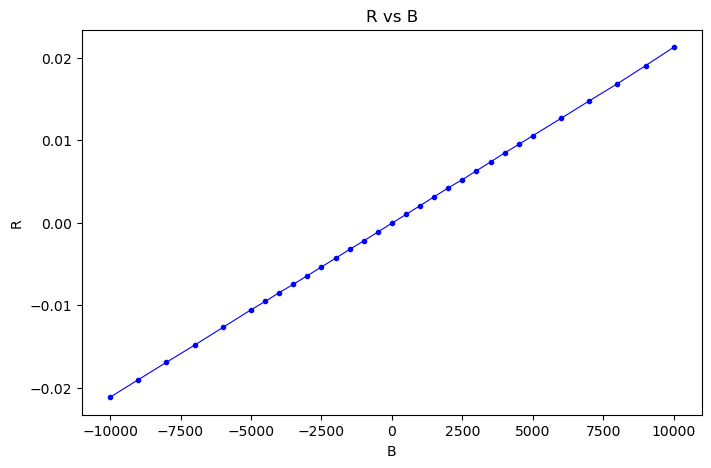

In [68]:
plt.figure(figsize=(8,5))

plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

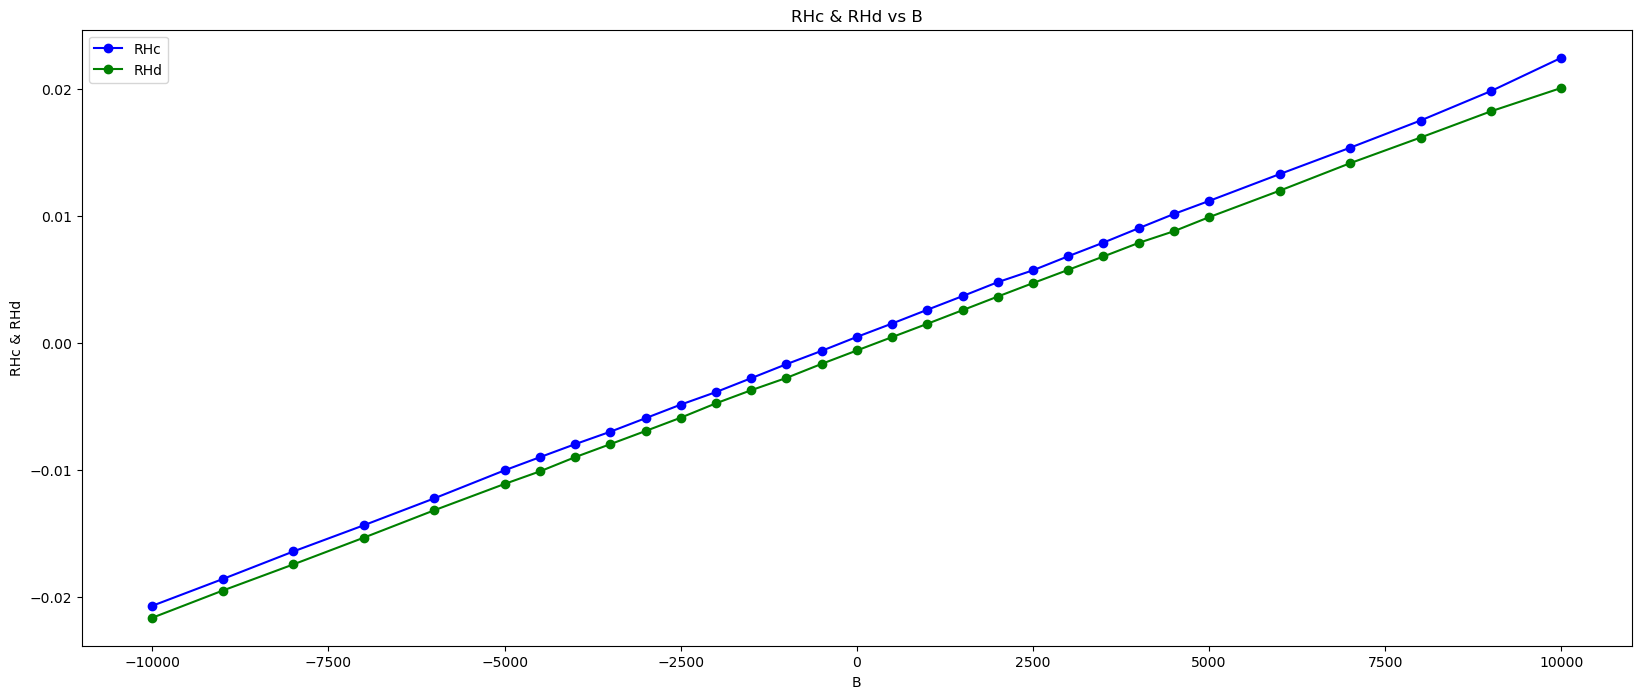

In [87]:
plt.figure(figsize=(20,8))
plt.plot(data['B'],data['RHc'],'bo-', label = 'RHc')
plt.plot(data['B'],data['RHd'],'go-', label = 'RHd')

plt.title('RHc & RHd vs B')
plt.ylabel('RHc & RHd')
plt.xlabel('B')
plt.legend()
plt.show()

## Creating Increasing Field data

In [70]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,200.000192,-799.054709,799.024018,809.600218,-809.637166,-810.284730,810.280662,799.619056,-799.509714,1000000
1,0.001,-9000,200.000941,-799.600907,799.603419,809.113253,-809.113861,-809.515098,809.548126,799.999305,-799.963550,1000000
2,0.001,-8000,200.000476,-800.172731,800.180261,808.595258,-808.640041,-808.927080,808.962781,800.507737,-800.532906,1000000
3,0.001,-7000,200.000948,-800.704485,800.689358,808.080029,-808.081223,-808.390527,808.396318,800.962638,-801.026077,1000000
4,0.001,-6000,200.000850,-801.200192,801.184821,807.498888,-807.517909,-807.847566,807.850885,801.494129,-801.516649,1000000


### Hall resistance calculation

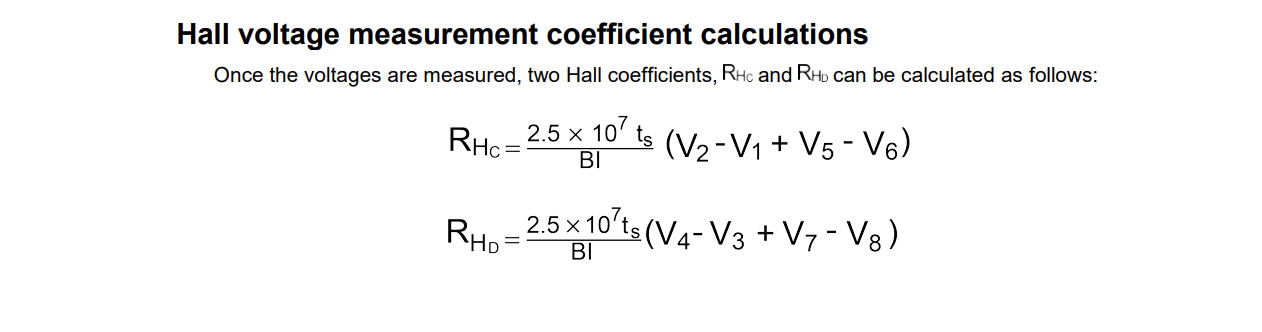

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [71]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

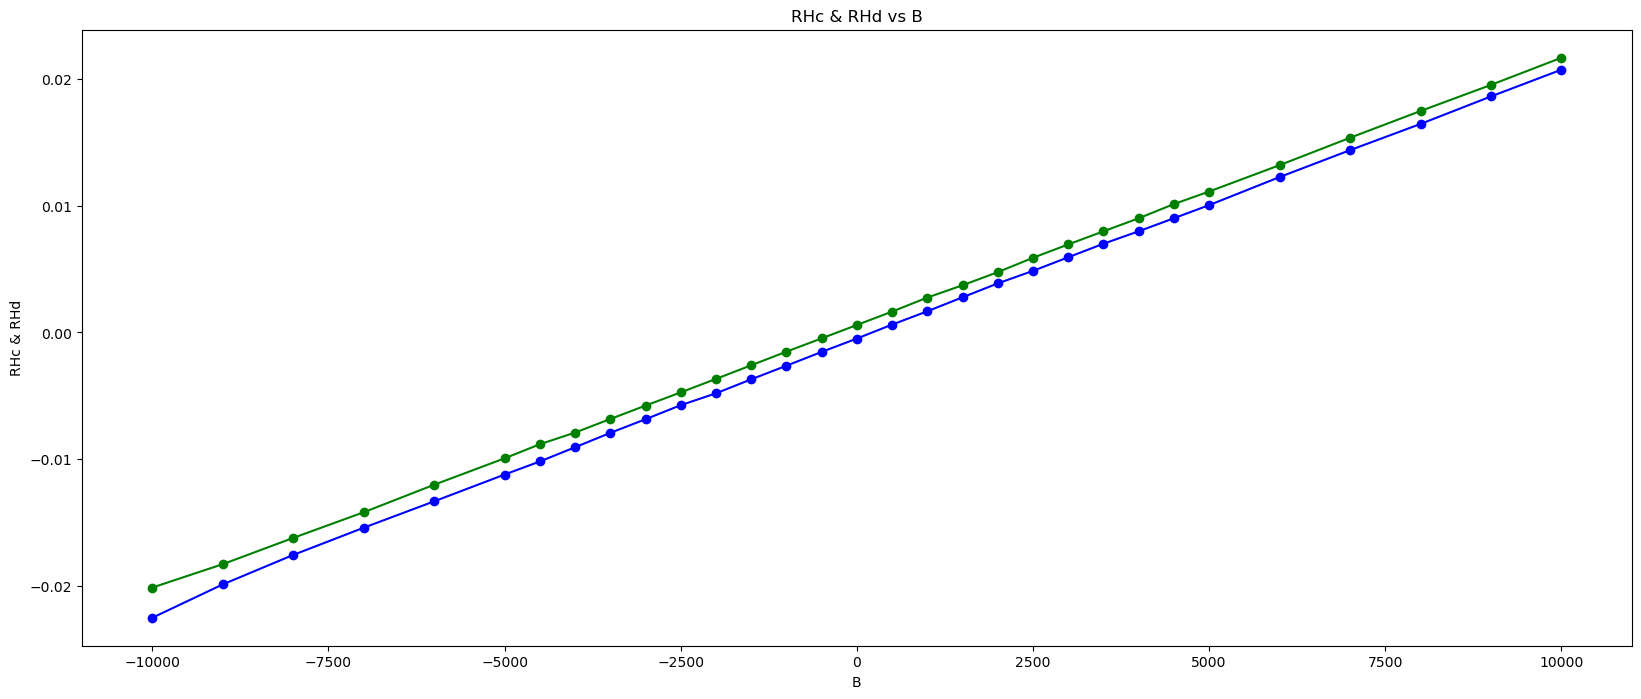

In [88]:
plt.figure(figsize=(20,8))
plt.plot(data2['B'],data2['RHc'],'bo-', label = 'RHc')
plt.plot(data2['B'],data2['RHd'],'go-', label = 'RHd')

plt.title('RHc & RHd vs B')
plt.ylabel('RHc & RHd')
plt.xlabel('B')
plt.show()

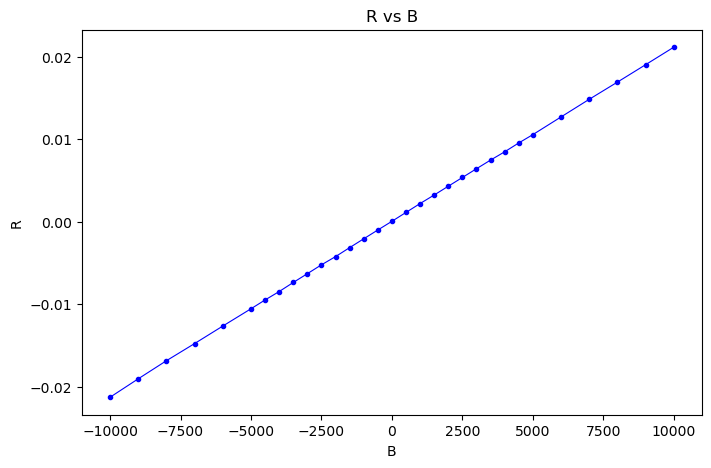

In [73]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

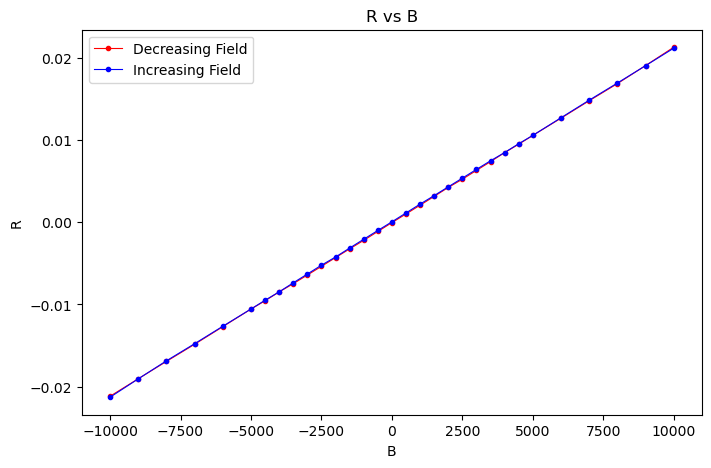

In [74]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

# Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
x = data['B'].values.reshape((-1,1))
y = data['R'].values

In [77]:
model = LinearRegression(fit_intercept = True).fit(x, y)

In [78]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

coefficient of determination: 0.9999867419546505
intercept: -3.201286162902312e-05
slope: [2.11819603e-06]


In [79]:
y_pred = model.predict(x)

# Hall Coefficient

In [80]:
slope = model.coef_ # ohm per gauss
thickness = 54*10**-5 # in cm

In [81]:
R_hall_coef =1/( 2.5*(10**7)*thickness*slope[0])

In [82]:
R_hall_coef #cm3/C

34.97035833273004

# Density of Charge Carrier

In [83]:
n = 1/(R_hall_coef*1.602*10**-19)  

In [84]:
n # per cubic cm

1.7849966517474624e+17